In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing,metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv("Automobile price data _Raw_.csv")

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
df.replace('?', np.nan, inplace=True)

In [5]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

<AxesSubplot:>

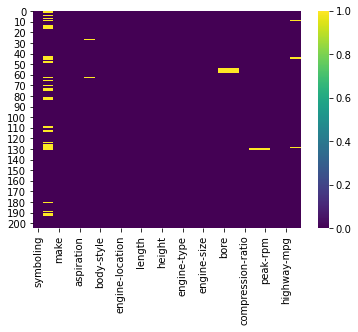

In [6]:
sns.heatmap(df.isnull(),cmap='viridis')

In [7]:
print(df['peak-rpm'].isnull().sum())
print(df['normalized-losses'].isnull().sum())
print(df['bore'].isnull().sum())
print(df['horsepower'].isnull().sum())
print(df['stroke'].isnull().sum())

2
41
4
2
4


In [8]:
def impute(columns):
    for column_name in columns:
        df[column_name] = df[column_name].astype(float)
        df[column_name] = df[column_name].fillna(pd.to_numeric(df[column_name], errors='coerce').mean())
df['price'] = df['price'].astype(float)

In [9]:
impute(['normalized-losses','bore','stroke','horsepower','peak-rpm'])

In [10]:
df[df.isnull().any(axis=1)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
44,1,122.0,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,122.0,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
63,0,122.0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0
129,1,122.0,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


In [11]:
print(df["num-of-doors"].value_counts())

four    114
two      89
Name: num-of-doors, dtype: int64


In [12]:
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)

In [13]:
df[df.isnull().any(axis=1)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,122.0,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,122.0,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,122.0,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


In [14]:
df.dropna(axis=0, how='any', inplace=True)

<AxesSubplot:>

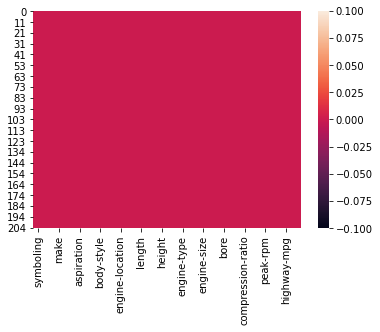

In [15]:
sns.heatmap(df.isnull())

In [16]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098267,-0.063561,-0.033956,-0.034636,0.082269


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

## EXPLORATORY DATA ANALYSIS 

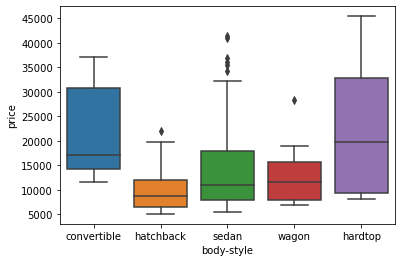

In [18]:
sns.boxplot(x="body-style", y="price", data=df)
plt.savefig('2')

C:\Users\Public\Anaconda\envs\myenv1\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


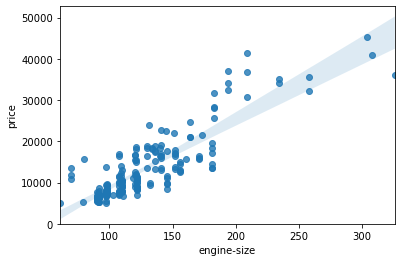

In [19]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)
plt.savefig('1')

In [20]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


C:\Users\Public\Anaconda\envs\myenv1\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


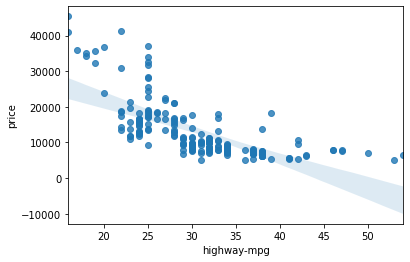

In [21]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.savefig('3')  

In [22]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


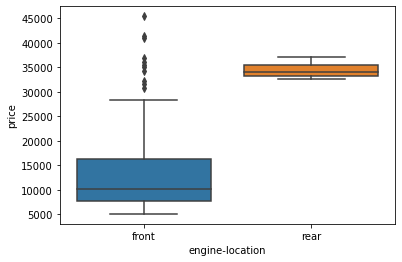

In [23]:
sns.boxplot(x="engine-location", y="price", data=df)
plt.savefig('4')

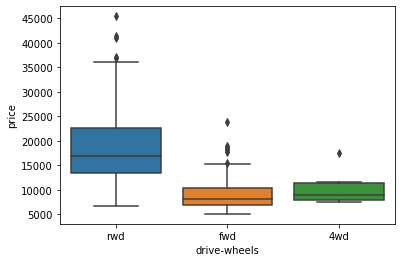

In [24]:
sns.boxplot(x="drive-wheels", y="price", data=df) 
plt.savefig('5')

C:\Users\Public\Anaconda\envs\myenv1\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


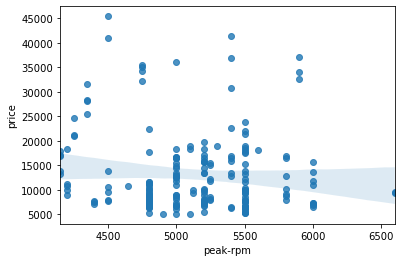

In [25]:
sns.regplot(x="peak-rpm", y="price", data=df)
plt.savefig('6')

In [26]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


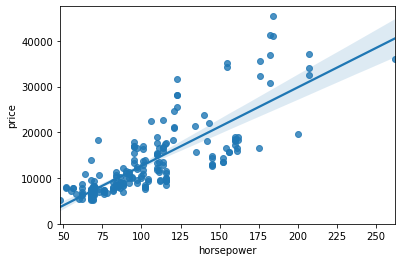

In [27]:
sns.regplot(x="horsepower", y="price", data=df)
plt.ylim(0,)
plt.savefig('7')

In [28]:
def encode(column_names):
    enc = preprocessing.LabelEncoder()
    for col in column_names:
        enc.fit(df[col])
        df[col+'_enc'] = enc.transform(df[col])

In [29]:
encode(df.select_dtypes(exclude=np.number).columns.to_list())

In [30]:
df.drop(df.select_dtypes(exclude=np.number).columns.to_list(), axis=1, inplace=True)

In [31]:
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,make_enc,fuel-type_enc,aspiration_enc,num-of-doors_enc,body-style_enc,drive-wheels_enc,engine-location_enc,engine-type_enc,num-of-cylinders_enc,fuel-system_enc
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,1,0,1,0,2,0,0,2,5
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,1,0,1,0,2,0,0,2,5
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,1,0,1,2,2,0,4,3,5
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,1,1,0,0,3,1,0,2,2,5
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,1,1,0,0,3,0,0,2,1,5


In [32]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'price'],df['price'], test_size=0.3, random_state=101)

In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 25)
(140,)
(61, 25)
(61,)


## Linear Regression 

Coefficients: 
 [ 2.47316239e+02 -9.66259198e+00  2.07342709e+02 -5.90790741e+01
  4.14171567e+02  1.75199199e+02  3.03850693e+00  8.49188858e+01
 -2.40364681e+03 -2.07189314e+03  8.09549900e+02  1.72927407e+01
  8.87570571e-01 -1.42483123e+02  1.05932529e+02 -1.69985241e+02
  9.83696275e+03  1.11918632e+03 -1.09980634e+03 -1.25268364e+03
  1.83300944e+03  1.09746675e+04  2.21960525e+02 -7.06681927e+02
  7.92960303e+01] 

R2 Score:  0.8092320637168342 



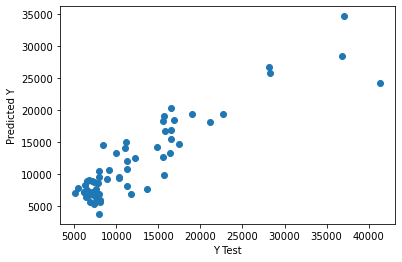

In [34]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print('Coefficients: \n', lm.coef_, '\n')
predictions = lm.predict( X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y') 
print('R2 Score: ', metrics.r2_score(y_test, predictions),'\n')

## Random Forest Regressor 

R2 Score: 0.9403480188536405


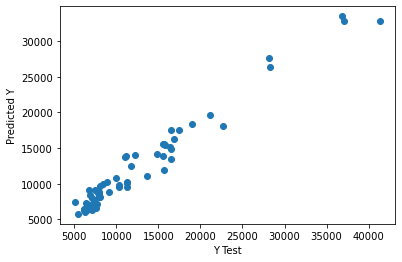

In [35]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
predictions=rf.predict(X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


from sklearn import metrics

print('R2 Score:', metrics.r2_score(y_test, predictions))

## Decision Tree Regressor 

R2 Score:  0.9012478421695049


Text(0, 0.5, 'Predicted Y')

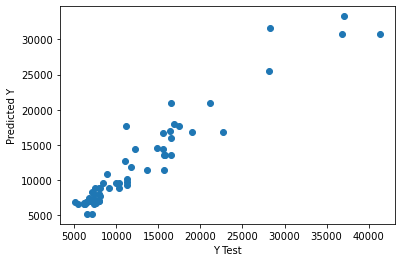

In [36]:
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor(random_state = 0)  
regressor.fit(X_train, y_train) 
predictions = regressor.predict(X_test)
plt.scatter(y_test, predictions)  
print("R2 Score: ", metrics.r2_score(y_test, predictions))
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')